# Twitter Analysis 
# 1)Get twitter data 
# 2)Get sentiments
# 3)Do analysis


In [1]:
!pip install tweepy
!pip install textblob



You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install matplotlib
!pip install regex


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install  wordcloud 

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [5]:
import tweepy
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import re
plt.style.use('fivethirtyeight')


In [6]:
from wordcloud import WordCloud

# Get the tweets

In [7]:
# Twitter API credentials
APIkey="fgZBioScvhILhWv0hsjNlAiaP"
apisecret="UHyKw08QeYSAbT5CrlSNzEynZL1Me7mjbrMAt6R1nAOgUH2dhl"
accesstoken="1402625454897520651-uwUe2m1Vg65v4NjPJfVhagGOlfWOYS"
accesstokensecret="vSayTNG8CDOyRCXLA2iFyCVBpBLcOPV7keJB3ZMUMyHC8"

In [8]:
# create an athentication object
authenticate=tweepy.OAuthHandler(APIkey,apisecret)
authenticate.set_access_token(accesstoken,accesstokensecret)
api=tweepy.API(authenticate)

In [46]:
posts=api.user_timeline(screen_name='editorji',count=100,language="en",tweet_mode='extended')
i=1
for tweet in posts[:10]:
    print(str(i) + ')' + tweet.full_text + '\n')
    i=i+1

1)Registration of two #KhanMarket eateries, Town Hall and #KhanChacha, owned by businessman #NavneetKalra cancelled. https://t.co/kONXQzPOas

2)ED again summoned Maharashtra’s former home minister #AnilDeshmukh, his son Hrishikesh in connection with an alleged #moneylaundering case, asks them to appear before it on August 2. https://t.co/qYjutotmbk

3)#EJexplains | What is porn? What is erotica then that #RajKundra claims his app content is about?

Why does India consume so much #porn despite a ban? What does the law say? #NewsGuru @vikramchandra explains https://t.co/ub9rZudMOI

4)#BombayHighCourt pulls up #ShilpaShetty's lawyer during defamation plea hearing, asks "How is news on crying defamatory?"

#RajKundraArrested https://t.co/HfxyUv2w1w

5)#ICYMI - Centre asks state govts to ensure adherence to #COVID19 protocols😷

Advisory comes as some witness an increase in the 'R' factor⬆️

So what is the Covid 'R' factor❓

Here's your complete lowdown👇

#rFactor | #COVID19India https://t.c

In [47]:
# create a dataframe
df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])

In [48]:
df


,Tweets
0,"Registration of two #KhanMarket eateries, Town..."
1,ED again summoned Maharashtra’s former home mi...
2,#EJexplains | What is porn? What is erotica th...
3,#BombayHighCourt pulls up #ShilpaShetty's lawy...
4,#ICYMI - Centre asks state govts to ensure adh...
...,...
95,#Tokyo2020 | All excited for India's performan...
96,#Tokyo2020 | All excited for India's performan...
97,#Tokyo2020 | All excited for India's performan...
98,#Tokyo2020 | All excited for India's performan...


In [49]:
#function to clean tweets
def cleantext(text):
    text=re.sub('@[A-Za-z-9]+','',text) # removing useless characters
    text=re.sub('#','',text)  # removing #
    text=re.sub('RT[\s]','',text) #removing retweets
    text=re.sub('https?:\/\/\S+','',text) # removing links
    return text

In [50]:
df['Tweets']= df['Tweets'].apply(cleantext)

In [51]:
df

,Tweets
0,"Registration of two KhanMarket eateries, Town ..."
1,ED again summoned Maharashtra’s former home mi...
2,EJexplains | What is porn? What is erotica the...
3,BombayHighCourt pulls up ShilpaShetty's lawyer...
4,ICYMI - Centre asks state govts to ensure adhe...
...,...
95,Tokyo2020 | All excited for India's performanc...
96,Tokyo2020 | All excited for India's performanc...
97,Tokyo2020 | All excited for India's performanc...
98,Tokyo2020 | All excited for India's performanc...


In [52]:
analysis=TextBlob("today eas good day")

In [53]:
analysis.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [54]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
    
def getpolarity(text):
    return TextBlob(text).sentiment.polarity    

df['Subjectivity']=df['Tweets'].apply(getsubjectivity)

df['Polarity']=df['Tweets'].apply(getpolarity)


In [55]:
df

,Tweets,Subjectivity,Polarity
0,"Registration of two KhanMarket eateries, Town ...",0.00,0.000
1,ED again summoned Maharashtra’s former home mi...,0.05,-0.050
2,EJexplains | What is porn? What is erotica the...,0.20,0.200
3,BombayHighCourt pulls up ShilpaShetty's lawyer...,0.60,-0.200
4,ICYMI - Centre asks state govts to ensure adhe...,0.40,0.100
...,...,...,...
95,Tokyo2020 | All excited for India's performanc...,0.75,0.375
96,Tokyo2020 | All excited for India's performanc...,0.75,0.375
97,Tokyo2020 | All excited for India's performanc...,0.75,0.375
98,Tokyo2020 | All excited for India's performanc...,0.75,0.375


# Start Analysis

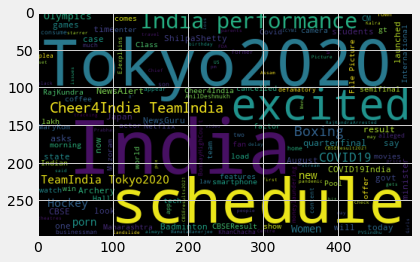

In [56]:
# World CLoud Visualisaion
allwords=''.join([i for i in df['Tweets']]) 
Cloud=WordCloud(width=500,height=300,random_state=0,max_font_size=100).generate(allwords)
plt.imshow(Cloud)
plt.show()


In [57]:
# Create a function to get Poaitive, Neutral ,Negative

def GetAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis']=df['Polarity'].apply(GetAnalysis)
df
    

,Tweets,Subjectivity,Polarity,Analysis
0,"Registration of two KhanMarket eateries, Town ...",0.00,0.000,Neutral
1,ED again summoned Maharashtra’s former home mi...,0.05,-0.050,Negative
2,EJexplains | What is porn? What is erotica the...,0.20,0.200,Positive
3,BombayHighCourt pulls up ShilpaShetty's lawyer...,0.60,-0.200,Negative
4,ICYMI - Centre asks state govts to ensure adhe...,0.40,0.100,Positive
...,...,...,...,...
95,Tokyo2020 | All excited for India's performanc...,0.75,0.375,Positive
96,Tokyo2020 | All excited for India's performanc...,0.75,0.375,Positive
97,Tokyo2020 | All excited for India's performanc...,0.75,0.375,Positive
98,Tokyo2020 | All excited for India's performanc...,0.75,0.375,Positive


In [58]:
df['Analysis'].value_counts()

Positive    46
Neutral     32
Negative    22
Name: Analysis, dtype: int64

In [59]:
df.shape

(100, 4)

In [60]:
df[df['Analysis']=='Neutral']

,Tweets,Subjectivity,Polarity,Analysis
0,"Registration of two KhanMarket eateries, Town ...",0.000,0.0,Neutral
5,"MotorolaEdge20, MotorolaEdge20Lite and Motorol...",0.000,0.0,Neutral
6,"From 'Mimi' to 'ResortToLove', here's what you...",0.000,0.0,Neutral
7,Streaming Now :: Time to re-evaluate India's a...,0.000,0.0,Neutral
8,ZydusCadila gets US FDA nod to market Fulvestr...,0.000,0.0,Neutral
10,Mizoram Chief Minister Zoramthanga said North-...,0.000,0.0,Neutral
25,"MicromaxIn2b smartphone launched in India, get...",0.000,0.0,Neutral
26,"AkshayKumar, VaaniKapoor, Huma Qureshi, and La...",0.000,0.0,Neutral
29,NewsAlert - Hockey | India advance to the quar...,0.000,0.0,Neutral
30,COVID19India - International flights may remai...,0.000,0.0,Neutral


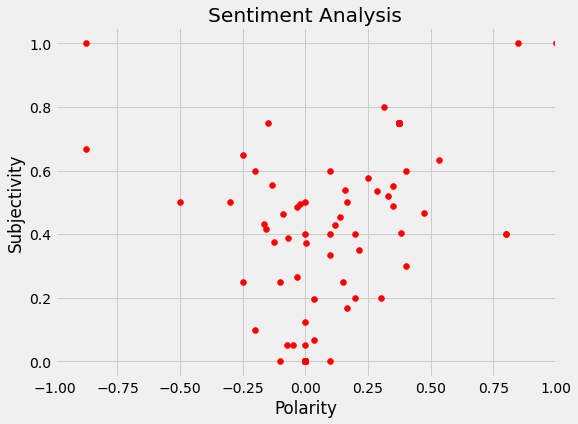

In [61]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Red')
    
plt.title("Sentiment Analysis")   
plt.xlim(-1,1)
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()
    

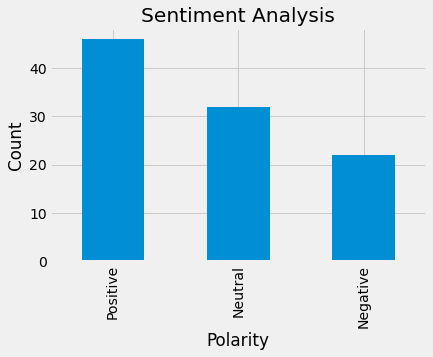

In [62]:
df['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Count")
plt.show()

In [63]:
# Get the positive tweets
i=1
sorted_df= df.sort_values(by='Polarity',ascending='False')
for j in range(0,sorted_df.shape[0]):
    if(sorted_df['Analysis'][j]=='Positive'):
        print(str(i)+ ')' + sorted_df['Tweets'][j])
        print()
        i=i+1
    

1)EJexplains | What is porn? What is erotica then that RajKundra claims his app content is about?

Why does India consume so much porn despite a ban? What does the law say? NewsGuru  explains 

2)ICYMI - Centre asks state govts to ensure adherence to COVID19 protocols😷

Advisory comes as some witness an increase in the 'R' factor⬆️

So what is the Covid 'R' factor❓

Here's your complete lowdown👇

rFactor | COVID19India 

3)If you're a fan of thriller movies and love an unexpected ending, then these movies are a must watch for you! 

Bollywood | WeekendWatch 



4)Tokyo2020 | All excited for India's performance in Badminton ? 

Here's the schedule for you 👇 

 | Cheer4India | TeamIndia 

5)Tokyo2020 | All excited for India's performance in Boxing ? 

Here's the schedule for you 👇

 | Cheer4India | TeamIndia 

6)Tokyo2020 | All excited for India's performance in Hockey ? 

Here's the schedule for you 👇

 | Cheer4India | TeamIndia 

7)Tokyo2020 | All excited for India's performance in Arc

In [64]:
# Get the negative tweets
i=1
sorted_df= df.sort_values(by='Polarity',ascending='False')
for j in range(0,sorted_df.shape[0]):
    if(sorted_df['Analysis'][j]=='Negative'):
        print(str(i)+ ')' + sorted_df['Tweets'][j])
        print()
        i=i+1

1)ED again summoned Maharashtra’s former home minister AnilDeshmukh, his son Hrishikesh in connection with an alleged moneylaundering case, asks them to appear before it on August 2. 

2)BombayHighCourt pulls up ShilpaShetty's lawyer during defamation plea hearing, asks "How is news on crying defamatory?"

RajKundraArrested 

3)NewsAlert - Licenses of Navneet Kalra’s KhanChacha, Town Hall restaurants cancelled, DelhiHighCourt told. Kalra is an accused in black marketing of oxygenconcentrators. 

(File Picture) 

4)New research has now busted one major side effect that is commonly associated with coffee consumption.

CoffeeLovers | HealthTips 

5)Oops. Sorry, there's a slight delay in the stream. We'll now be live at 8 pm!

PS: Suprise! There's a bonus EJexplains video by NewsGuru  in today's show! 

6)Late actor PratyushaBanerjee's parents have spoken about the financial strain that fighting her legal battles has put them in. 

7)Tokyo2020 | PVSindhu battled hard in the 56-minute long 

In [36]:
# Get the neutral tweets
i=1
sorted_df= df.sort_values(by='Polarity',ascending='False')
for j in range(0,sorted_df.shape[0]):
    if(sorted_df['Analysis'][j]=='Neutral'):
        print(str(i)+ ')' + sorted_df['Tweets'][j])
        print()
        i=i+1

1)A wee dram is a must during any visit to our famed Clavis Whisky Bar at ’s MacLeod House, but especially on NationalScotchDay. 

2)‘Tis the season for lounging poolside. 

3)Escape to enchanting  for an unmatched travel experience. 

Our  NeverSettleSummer offer features a dining credit and your choice of a Cliffs of Moher picnic or Horseback Riding excursion. Book today:
 

4)Everything you need to unwind. 

5): Take your travels to the next level this summer with our curated NeverSettleSummer packages. Varying by destination and i…

6)We're toasting to WorldCocktailDay with a round-up of expertly crafted cocktails from our  and  destinations around the globe.🍹 

7)Discover the ultimate golf resort experience at , where luxury is woven into every detail. 

📷:  

8)We’re spending NationalBeerDay with a decadent burger followed by a lavish afternoon on the white sand beaches of . 

9): Spring Toward Travel with ! Featuring a spring themed amenity and a generous credit towards dining, 